In [130]:
# multidimensional arrays
import numpy as np
from math import log
from math import exp

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Generating uniformly distributed random numbers
We will use `numpy` to generate random numbers. To generate numbers uniformly distributed between 0 and 1, we can use the function `np.random.uniform()`. If you execute the cell below more than once, you will see how the output changes.

In [131]:
x = np.random.uniform()
print(x)

0.717018194740178


To generate many random numbers at once, use the `size` keyword

In [134]:
x_1d = np.random.uniform(size=10)
print(x_1d)

[0.88828978 0.1044339  0.69354127 0.84216921 0.5628602  0.61150703
 0.13191129 0.98791274 0.76977137 0.9567595 ]


We can also generate a whole matrix of random uniform numbers at once!

In [135]:
x_2d = np.random.uniform(size=(3, 3))
print(x_2d)

[[0.67630919 0.19206744 0.13909219]
 [0.79640036 0.91998838 0.16107334]
 [0.86102385 0.74259771 0.20142342]]


### Exercise
How would you generate 1000 random numbers uniformely distributed between 5 and 20?

In [136]:
# write your code here
data = np.random.uniform(low= 5, high=20, size=1000)
print(data)


[19.33280075 12.83760061 13.6540218  17.65494712 13.53277716 10.133916
 19.88871876 18.21378169 10.85411555 11.90463751 15.22361728  8.46903618
 12.25001825 11.36224897 12.94346407 17.61123326  9.37813126 17.55244984
 18.24619062  7.76501981  8.61027563 14.21779338  8.72830128 15.9427967
 10.29695527 17.50711131 19.41080748 14.29771995 12.1842636  18.08384814
 19.03321651 12.58674911 10.52839243 15.83967511 19.23935714  6.88099638
 17.12864862 10.80680832  9.47076036  5.9757699  11.11997031 11.03015833
 18.01867047  9.3727546  17.26056346 16.22160999 13.10244882 17.17519424
  6.72656968 11.33769473 14.92280895 11.96275689 17.08707147 15.08497867
 10.86080193 16.37174216 11.61886681  7.99564714 12.595441   13.42367736
 11.0191      5.89049988  8.34092673 18.92091052 19.78739224  6.48006522
 10.29408084  7.98700662  5.0684475   8.00341591  9.53920906  9.1856165
  7.13074491 10.70906556  6.71063356 14.86551172 17.71054079 18.56935637
 11.09367368 17.61072182 13.02549907 11.4908027   8.101

### Plotting the density of a sample
As a simple sanity check, we want to plot the density of the data we have generated. We will use the function `plt.hist()` to plot the estimated pdf of our randomly generated data:

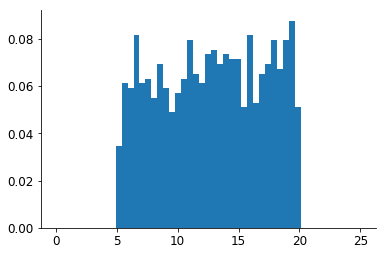

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True
);

To make sure our estimation ressembles the actual probability density function of a uniform random variable, we will create a function that computes the pdf of a uniform random variable between $a$ and $b$ at an arbitrary point $x$.

### Exercise
What is the probability density function (pdf) of a uniform random variable between $a$ and $b$?



In [ ]:
# The pdf of a uniform random variable between a and b is: f(x) = 1/(b-a)

### Exercise
Write a function that gives the density of a uniform random variable between $a$ and $b$ at an arbitrary point $x$. Notice that you can define optional arguments by including them in the definition and giving them a default value.

In [138]:
def uniform_pdf(x, a=0, b=1): #uniform pdf of a variable x between 0 and 1
    if x < a:
        return 0
    elif x > b:
        return 0
    else:
        return 1/(b-a)

Now we can add the expected pdf into the plot. The function `np.linspace(start, stop, num)` generates `num` equally spaces numbers between `start` and `stop`, both included.

In [139]:
x = np.linspace(start=0, stop=25, num=1000)
pdf_x = np.array([
    uniform_pdf(t, a=5, b=20)
    for t in x 
])

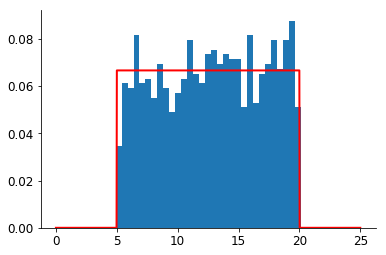

In [140]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


# plot empirical estimation
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True
);

# plot theoretical prediction
ax.plot(
    x, pdf_x,
    color="red",
    lw=2
)



## Adding labels and legend
Axis labels and legends are the most important parts of a plot. Without them, we don't know what is what! So, let us add labels, a legend and a title to our plot

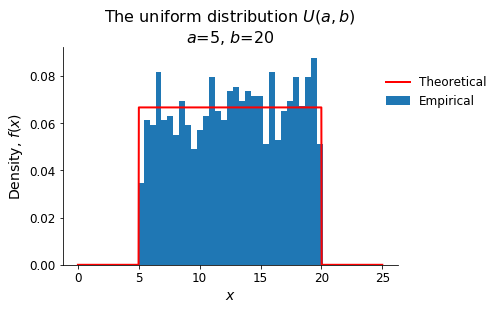

In [141]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


# plot empirical estimation
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True,
    label="Empirical"
);

# plot theoretical prediction
ax.plot(
    x, pdf_x,
    color="red",
    lw=2,
    label="Theoretical"
)

# add labels for axes
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"Density, $f(x)$")

# add legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add title
ax.set_title(f"The uniform distribution $U(a, b)$\n$a$=5, $b$=20");

### Exercise
Verify that, if the sample size increase, our empirical estimation gets closer to the theoretical prediction. Do so for the following cases:
+ $a=0, b=1$
+ $a=-3, b=-1.2$
+ $a=1800, b=1990$

**Hint** Instead of copy-pasting the code to generate the figure many times, you could put the code inside a function `plot_comparison(N, a, b)`. The function will have 3 arguments: the sample size $N$ and the bounds $a, b$ of the uniform random variable. You can set a title that depends on the values of $a, b, N$ as follows

```python
ax.set_title(f"The uniform distribution $U(a, b)$\n$a$={a}, $b$={b}, $N$={N}");
```


In [142]:
def plot_comparison(N, a, b):
    # generate the random data
    data = np.random.uniform(a, b, N)
    
    # compute the theoretical distribution
    dx = (b - a) / 10
    x = np.linspace(a - dx, b + dx, num=1000)
    pdf_x = np.array([
    uniform_pdf(t, a, b)
    for t in x 
    ])
    
    # generate a figure with a single subplot, of some size
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    
    # plot empirical estimation
    bins = np.linspace(a-1, b+1, num=2 * 26)
    ax.hist(
        data,
        bins=bins,
        density=True,
        label="Empirical"
    );


    # plot theoretical prediction
    ax.plot(    
        x, pdf_x,
        color="red",
        lw=2,
        label="Theoretical"
    )


    # add labels for axes
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"Density, $f(x)$")
    
    # add legend
    ax.legend(loc=(0.95, 0.7), frameon=False)
    
    # add title
    ax.set_title(f"The uniform distribution $U(a, b)$\n$a$={a}, $b$={b}, $N$={N}");

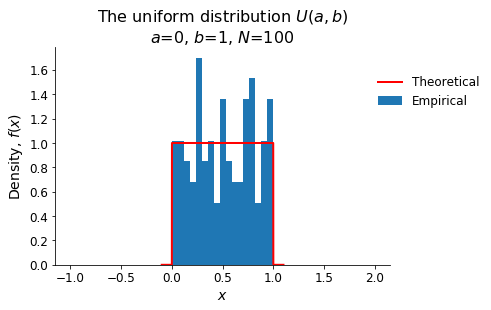

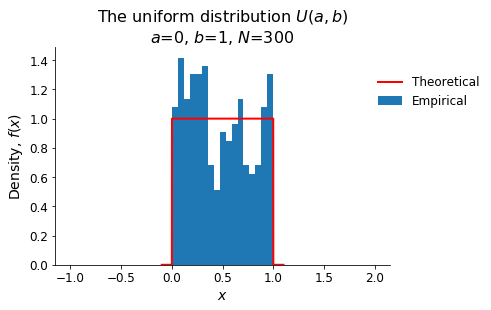

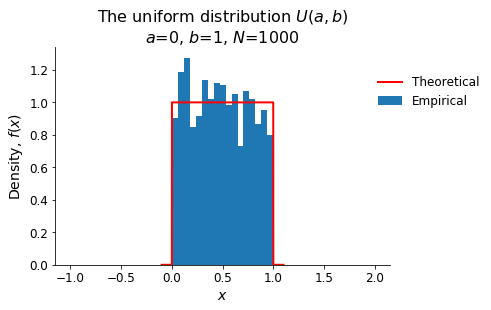

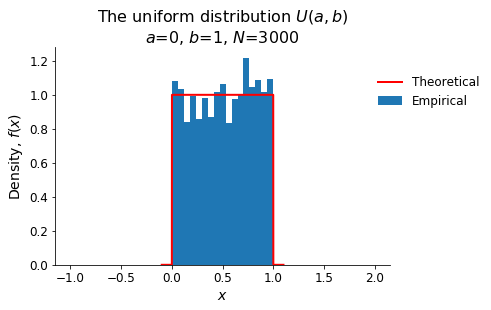

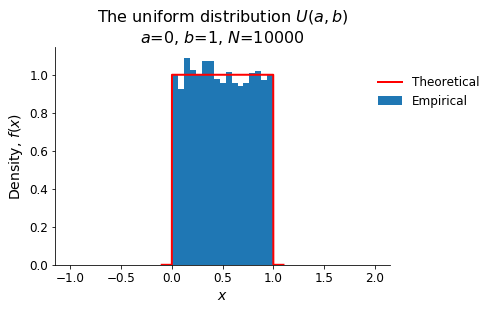

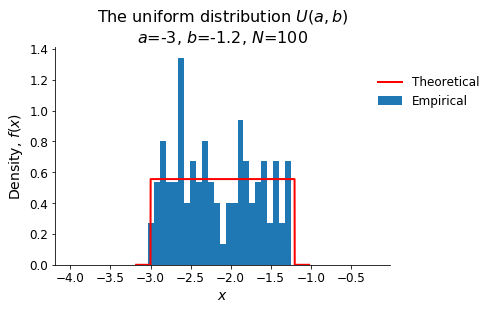

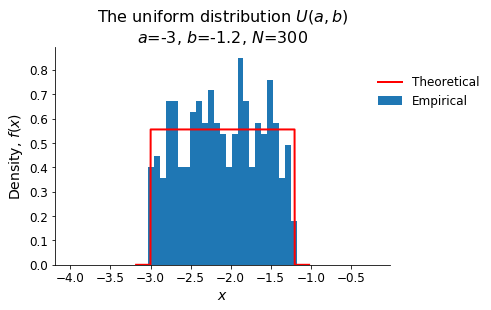

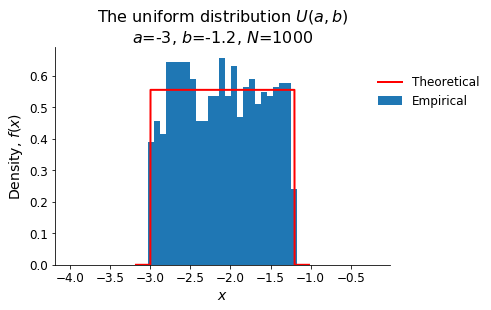

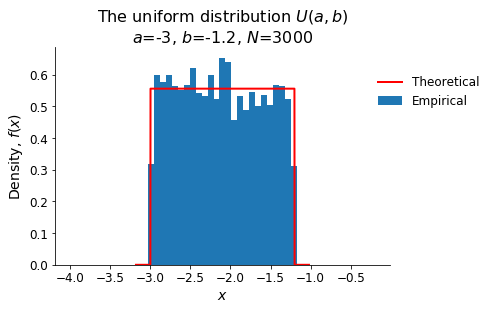

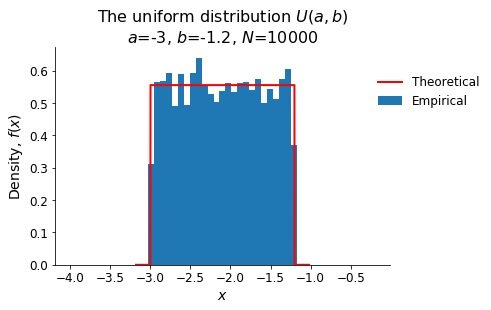

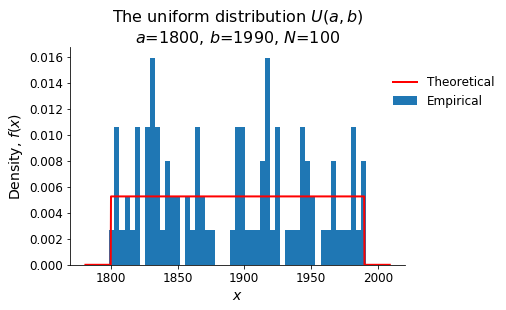

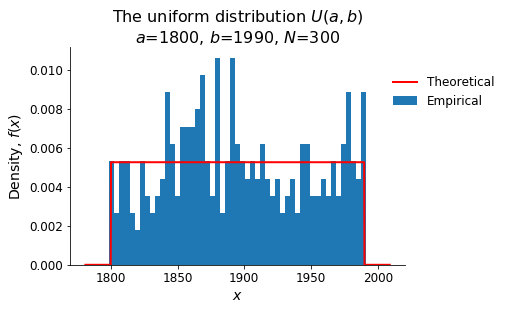

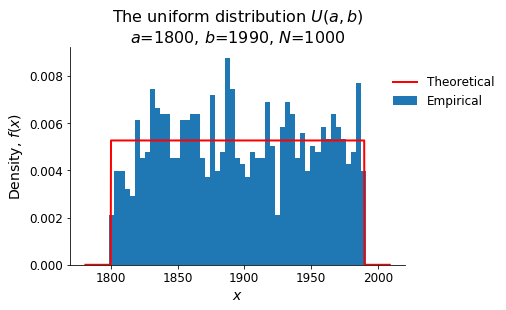

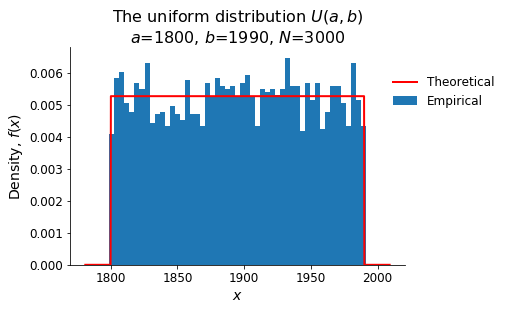

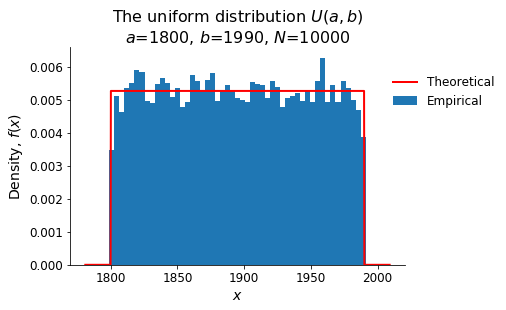

In [143]:
# plot all comparison in a loop
for (a, b) in [(0, 1), (-3, -1.2), (1800, 1990)]:
    for N in [100, 300, 1000, 3000, 10000]:
         plot_comparison(N, a, b)

## Generating random numbers with non-uniform distributions
In many cases, we want to draw random numbers from non-uniform distributions. For instance, we might want to generate Gaussian, exponential or Poisson distributed random numbers. How can we do this in plain python?

### Inverse transform sampling
The most general way of generating random numbers under a given distribution is known as **inverse transform sampling**. You can read about the method [here](link), but the key theoretical foundation of the method is very simple:

Given a continous random variable $X$ with cumulative distribution function $F$, the random variable $F(X)$ has a uniform distribution between 0 and 1. 

$$
F(X) \sim U(0, 1)
$$

Think about it for a second. Here $F(X)$ is not a function, but a random variable, because we apply a function, $F$, to a random variable, $X$, getting a new random variable, $Y \equiv F(X)$. The statement is then simply that $Y$ is a uniform random variable, no matter what form $F$ takes.

As a consequence, one can see that $X = F^{-1}(U)$, where $U$ is a uniform random variable between 0 and 1. This gives as a very simple way of drawing random numbers from an arbitrary continous random variable $X$:

1. Generate a uniform random number, $u$
2. Compute $x = F^{-1}(u)$

where $F$ is the cumulative distribution function of $X$.

### Exercise
Consider the **exponential** distribution, with probability density function 
$$
f(x) = \lambda e^{-\lambda x}
$$
and cumulative distribution function
$$
F(x) = 1 - e^{-\lambda x}
$$
1. Write a function that generates exponentially-distributed random numbers, using the inverse transform sampling method. For simplicity, set $\lambda = 1$.
2. Generate 1000 exponentially-distributed random numbers with your function.
3. Plot a histogram of your generated sample, together with the theoretical probability density function.

In [148]:
def inv_cdf_expo(y):
    """
    The inverse of y = 1 - exp(-x)
    """
    x = -1 * np.log(1-y)
    return x


def inverse_sampling(size): #(size, inv_cdf)??
    # generate uniform data of given_size
    u = np.random.uniform(size=size)
    # inverse transform it
    x = inv_cdf_expo(u)
    return x

# I get an exponentially-distributed random number x, starting from u which is evenly distributed between 0 and 1 

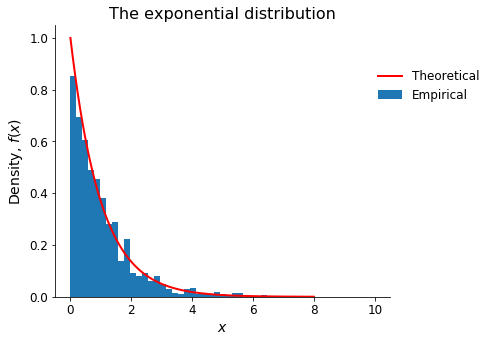

In [159]:
x = np.linspace(0, 8, num=200)
pdf_x = np.array([
    exp(-t)
    for t in x 
    ])
data = inverse_sampling(1000)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

bins = np.linspace(0, 10, num=2 * 26)

ax.hist(
    data,
    bins=bins,
    density=True,
    label="Empirical"
);

ax.plot(
    x, pdf_x,
    color="red",
    lw=2,
    label="Theoretical"
)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"Density, $f(x)$")

ax.legend(loc=(0.95, 0.7), frameon=False)

ax.set_title(f"The exponential distribution");

#ax.set_yscale("log")


## In practical situations, do not reinvent the wheel!
What we did so far is a good exercise to get comfortable with python, random number generation, histograms and probabilities.

If you need to generate exponential random numbers as part of a larger project, however, it is better to use a function from a **well-tested**, **well-documented** library such as [numpy]() or [scipy](). For instance:

```python
import numpy as np
x = np.random.exponential(scale=1, size=1000)
```

That is the beauty of **open-source** languages like python: there is a community of developers that contribute their code to standardized libraries in an organized fashion. These libraries are less likely than yours to contain errors or bugs, because they are used by many people and such bugs are reported and fixed very quickly. For instance numpy's `np.random` submodel contains functions to generate random numbers from many distributions, see [the documentation for numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions)

However, as you can see **not all** distributions are included in numpy. If you need to work with a less well-known distribution, you might need to implement that yourself. In such case, knowing the **inverse sampling** method will come in handy!

